In [ ]:
# What are we watching tonight?
# Which year(s) had the most highly rated shows?

In [162]:
# Imports
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from scipy.stats import linregress


In [163]:
# File to Load (Remember to Change These)
full_dataset = Path("tv_shows.csv")

In [164]:
# Read and store into Pandas DataFrame
yearly_data_df = pd.read_csv(full_dataset)


In [165]:
# Organize DataFrame
organized_yearly_data_df = yearly_data_df.drop(["Unnamed: 0", "Type", "ID", "Age"], axis=1)
organized_yearly_data_df

,Title,Year,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
0,Breaking Bad,2008,9.4/10,100/100,1,0,0,0
1,Stranger Things,2016,8.7/10,96/100,1,0,0,0
2,Attack on Titan,2013,9.0/10,95/100,1,1,0,0
3,Better Call Saul,2015,8.8/10,94/100,1,0,0,0
4,Dark,2017,8.8/10,93/100,1,0,0,0
...,...,...,...,...,...,...,...,...
5363,Paradise Islands,2017,NaN,10/100,0,0,0,1
5364,Mexico Untamed,2018,NaN,10/100,0,0,0,1
5365,Wild Centeral America,2020,NaN,10/100,0,0,0,1
5366,Wild Russia,2018,NaN,10/100,0,0,0,1


In [166]:
#Clean DataFrame of null values in IMDb and Rotten Tomatoes columns
cleaned_yearly_data_df = organized_yearly_data_df.dropna(subset=["IMDb", "Rotten Tomatoes"])
cleaned_yearly_data_df

,Title,Year,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
0,Breaking Bad,2008,9.4/10,100/100,1,0,0,0
1,Stranger Things,2016,8.7/10,96/100,1,0,0,0
2,Attack on Titan,2013,9.0/10,95/100,1,1,0,0
3,Better Call Saul,2015,8.8/10,94/100,1,0,0,0
4,Dark,2017,8.8/10,93/100,1,0,0,0
...,...,...,...,...,...,...,...,...
5339,Wild Chile,2018,7.5/10,30/100,0,0,0,1
5340,Howie Mandel's Animals Doing Things,2018,3.2/10,30/100,0,0,0,1
5341,The Big Fib,2020,5.4/10,29/100,0,0,0,1
5342,Vampirina: Ghoul Girls Rock!,2018,7.7/10,28/100,0,0,0,1


In [167]:
# Data conversion steps
def convert_fraction_to_integer(value):
    parts = value.split("/")
    numerator = float(parts[0])
    denominator = float(parts[1])
    result = round((numerator / denominator) * 100)
    return result

# Convert specific columns
columns_to_convert = ["IMDb", "Rotten Tomatoes"]

for col in columns_to_convert:
    cleaned_yearly_data_df[col] = cleaned_yearly_data_df[col].apply(convert_fraction_to_integer)

cleaned_yearly_data_df

C:\Users\richa\AppData\Local\Temp\ipykernel_13592\1367770718.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_yearly_data_df[col] = cleaned_yearly_data_df[col].apply(convert_fraction_to_integer)


,Title,Year,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
0,Breaking Bad,2008,94,100,1,0,0,0
1,Stranger Things,2016,87,96,1,0,0,0
2,Attack on Titan,2013,90,95,1,1,0,0
3,Better Call Saul,2015,88,94,1,0,0,0
4,Dark,2017,88,93,1,0,0,0
...,...,...,...,...,...,...,...,...
5339,Wild Chile,2018,75,30,0,0,0,1
5340,Howie Mandel's Animals Doing Things,2018,32,30,0,0,0,1
5341,The Big Fib,2020,54,29,0,0,0,1
5342,Vampirina: Ghoul Girls Rock!,2018,77,28,0,0,0,1


In [168]:
# Ascertaining the IMDb ratings above threshold (8.0 /10)
highest_ratings_im_df = cleaned_yearly_data_df.loc[(cleaned_yearly_data_df["IMDb"] >= 80)]
highest_ratings_im_df                   

,Title,Year,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
0,Breaking Bad,2008,94,100,1,0,0,0
1,Stranger Things,2016,87,96,1,0,0,0
2,Attack on Titan,2013,90,95,1,1,0,0
3,Better Call Saul,2015,88,94,1,0,0,0
4,Dark,2017,88,93,1,0,0,0
...,...,...,...,...,...,...,...,...
5309,Meet the Chimps,2020,85,37,0,0,0,1
5311,It's a Dog's Life with Bill Farmer,2020,82,37,0,0,0,1
5314,Wild Sri Lanka,2015,86,36,0,0,0,1
5317,"Dr. T, Lone Star Vet",2019,84,35,0,0,0,1


In [169]:
# Prepare data for plotting on line graph
yearly_count_imdb = highest_ratings_im_df.groupby("Year")["IMDb"].count().reset_index()


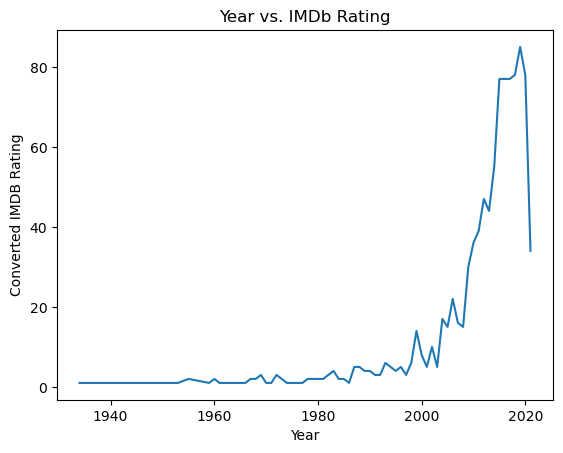

In [170]:
# Plotting data
x_axis = yearly_count_imdb["Year"]
y_axis = yearly_count_imdb["IMDb"]

plt.plot(x_axis, y_axis)
plt.title("Year vs. IMDb Rating")
plt.xlabel("Year")
plt.ylabel("Converted IMDB Rating")
plt.show()


In [ ]:
#Saving output for slides


In [171]:
# Presenting tabular data (IMDb)
highest_ratings_im = yearly_count_imdb.sort_values(by="IMDb", ascending=False)
highest_ratings_im.head(1)

,Year,IMDb
60,2019,85


In [172]:
# Ascertaining the Rotten Tomatoes ratings above threshold (80 /10)
highest_ratings_rt_df = cleaned_yearly_data_df.loc[(cleaned_yearly_data_df["Rotten Tomatoes"] >= 80)]
highest_ratings_rt_df 


,Title,Year,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
0,Breaking Bad,2008,94,100,1,0,0,0
1,Stranger Things,2016,87,96,1,0,0,0
2,Attack on Titan,2013,90,95,1,1,0,0
3,Better Call Saul,2015,88,94,1,0,0,0
4,Dark,2017,88,93,1,0,0,0
...,...,...,...,...,...,...,...,...
5060,The Falcon and the Winter Soldier,2021,74,86,0,0,0,1
5061,Star Wars: The Clone Wars,2008,83,85,0,0,0,1
5062,Once Upon a Time,2011,77,83,0,0,0,1
5063,Marvel's Agent Carter,2015,79,82,0,0,0,1


In [173]:
# Prepare data for plotting on line graph
yearly_count_rt = highest_ratings_rt_df.groupby("Year")["Rotten Tomatoes"].count().reset_index()


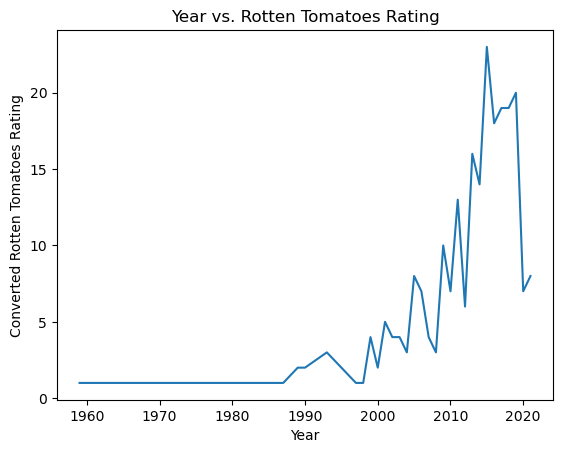

In [174]:
# Plotting data for Rotten Tomatoes
r_axis = yearly_count_rt["Year"]
s_axis = yearly_count_rt["Rotten Tomatoes"]

plt.plot(r_axis, s_axis)
plt.title("Year vs. Rotten Tomatoes Rating")
plt.xlabel("Year")
plt.ylabel("Converted Rotten Tomatoes Rating")
plt.show()


In [ ]:
#Saving output for slides


In [175]:
# Presenting tabular data (Rotten Tomatoes)
highest_ratings_rt = yearly_count_rt.sort_values(by="Rotten Tomatoes", ascending=False)
highest_ratings_rt.head(1)


,Year,Rotten Tomatoes
27,2015,23


In [195]:
# Filter for 2015-2019
segment_df =cleaned_yearly_data_df.loc[(cleaned_yearly_data_df["Year"] == 2019)]
segment_df


,Title,Year,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
18,The Witcher,2019,82,89,1,0,0,0
32,The Umbrella Academy,2019,80,87,1,0,0,0
35,Demon Slayer: Kimetsu no Yaiba,2019,87,86,1,1,0,0
43,When They See Us,2019,89,86,1,0,0,0
44,"Love, Death & Robots",2019,85,86,1,0,0,0
...,...,...,...,...,...,...,...,...
5317,"Dr. T, Lone Star Vet",2019,84,35,0,0,0,1
5329,Mickey Go Local,2019,60,34,0,0,0,1
5333,Out There with Jack Randall,2019,70,33,0,0,0,1
5336,Disney Family Sundays,2019,56,31,0,0,0,1


The r-value is: 0.49.
There is a moderately positive association between IMDb and Rotten Tomatoes ratings


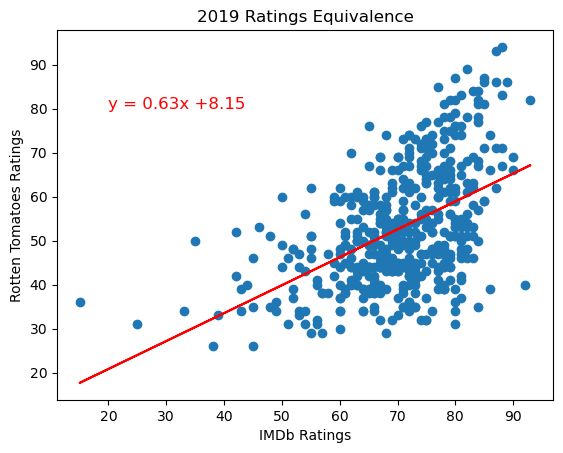

In [199]:
#Plotting 2019 equivalency and determining r-value
x_values = segment_df["IMDb"]
y_values = segment_df["Rotten Tomatoes"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')
plt.text(20, 80, line_eq, fontsize=12, color='red')
plt.title("2019 Ratings Equivalence")
plt.xlabel("IMDb Ratings")
plt.ylabel("Rotten Tomatoes Ratings")
print(f"The r-value is: {rvalue:.2f}.")
print(f"There is a moderately positive association between IMDb and Rotten Tomatoes ratings")

plt.show()

In [197]:
#Plotting equivalency and determining r-value for 2015-2019
four_year_segment_df =cleaned_yearly_data_df.loc[(cleaned_yearly_data_df["Year"] <= 2019) & 
                                 (cleaned_yearly_data_df["Year"] >= 2015)]
four_year_segment_df

,Title,Year,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
1,Stranger Things,2016,87,96,1,0,0,0
3,Better Call Saul,2015,88,94,1,0,0,0
4,Dark,2017,88,93,1,0,0,0
10,Mindhunter,2017,86,90,1,0,0,0
12,Narcos,2015,88,90,1,0,0,0
...,...,...,...,...,...,...,...,...
5337,Rocky Mountain Animal Rescue,2018,79,30,0,0,0,1
5338,Wild Nordic,2019,60,30,0,0,0,1
5339,Wild Chile,2018,75,30,0,0,0,1
5340,Howie Mandel's Animals Doing Things,2018,32,30,0,0,0,1


The r-value is: 0.47.
There is a moderately positive association between IMDb and Rotten Tomatoes ratings


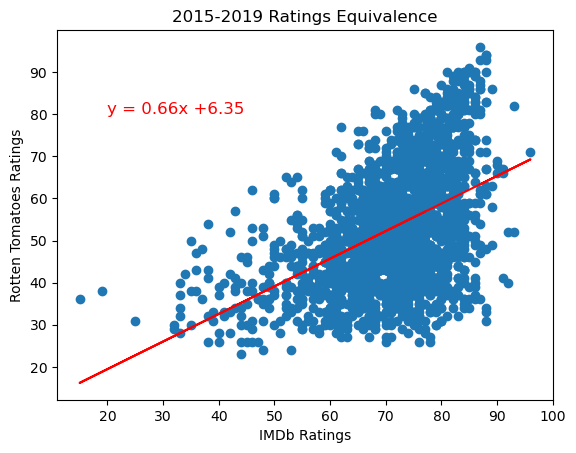

In [200]:
x_values = four_year_segment_df["IMDb"]
y_values = four_year_segment_df["Rotten Tomatoes"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')
plt.text(20, 80, line_eq, fontsize=12, color='red')
plt.title("2015-2019 Ratings Equivalence")
plt.xlabel("IMDb Ratings")
plt.ylabel("Rotten Tomatoes Ratings")
print(f"The r-value is: {rvalue:.2f}.")
print(f"There is a moderately positive association between IMDb and Rotten Tomatoes ratings")

plt.show()

In [ ]:
#Saving output for slides
